In [2]:
%matplotlib inline
import sys
sys.path.append('../src')
from params import params as P
import numpy as np
import patch_sampling
import cparallel
import matplotlib.pyplot as plt
import augment
np.random.seed(1)
P.DATA_LEVEL=1

Loaded configurations from (in order) ['../src/../config/default.ini', '../src/../config/notebook.ini']
OpenCV 2 NOT AVAILABLE, using skimage/scipy.ndimage instead


In [3]:
train_generator, validation_generator = patch_sampling.prepare_custom_sampler(override_cache_size=1)

Loading train samplers
Loading validation samplers
Loading samplers took 167.008784056 seconds.


In [4]:
X_val = [16]*100
val_gen = cparallel.ContinuousParallelBatchIterator(validation_generator, ordered=False,
                                                batch_size=1,
                                                multiprocess=False,
                                                n_producers=2)
val_gen.append(X_val)
val_gen.start()


In [5]:
# Create augmentation examples


batch = list(val_gen(1))[0]
images, labels, filenames = batch
images = images.transpose(0,2,3,1)
images[:,:,:,0] += P.MEAN_PIXEL[0]
images[:,:,:,1] += P.MEAN_PIXEL[1]
images[:,:,:,2] += P.MEAN_PIXEL[2]


2 IDC


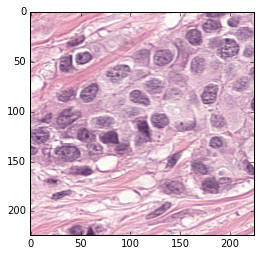

1.04456245415


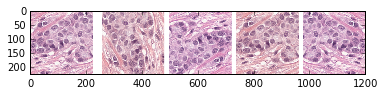

In [35]:
from dataset import label_name
im = images[10]
label = labels[9]
print label, label_name(label)

plt.imshow(im)
plt.show()

res = np.array(im)

print np.random.uniform(*P.AUGMENTATION_PARAMS['hue_range'])
# Add some augmentations
for n in range(4):
    aug = augment.augment([im.transpose(2,0,1)])[0]
    aug = aug.transpose(1,2,0)
    #plt.imshow(aug)
    #plt.show()
    
    res = np.hstack((res, np.ones((224,32 if n < 1 else 16,3)),aug))
    
plt.imsave('out10.png', res)
    
plt.imshow(res)
    

In [ ]:
%timeit
from tqdm import tqdm
import matplotlib.pyplot as plt
from dataset import label_name

for b,batch in enumerate(val_gen(11)):
    images, labels = batch

    if b != 0:
        continue

    #Shape into image_number,x,y,color
    im = images.transpose(0,2,3,1)

    im[:,:,:,0] += P.MEAN_PIXEL[0]
    im[:,:,:,1] += P.MEAN_PIXEL[1]
    im[:,:,:,2] += P.MEAN_PIXEL[2]



    f, axarr = plt.subplots(4,4,figsize=(12,12))


    for i in range(16):
        x = i%4
        y = i/4
        axarr[y,x].imshow(im[i])
        axarr[y,x].set_title(label_name(labels[i]))
        axarr[y,x].axis('off')

    plt.subplots_adjust(wspace = -0.3, hspace=0.15)
    plt.show()


In [ ]:
np.random.seed(0)
for batch in val_gen:
    images, labels = batch
    
    
        
    im = images.transpose(0,2,3,1)

    im[:,:,:,0] += P.MEAN_PIXEL[0]
    im[:,:,:,1] += P.MEAN_PIXEL[1]
    im[:,:,:,2] += P.MEAN_PIXEL[2]


    
    f, axarr = plt.subplots(4,4,figsize=(12,12))
    

    for i in range(16):
        x = i%4
        y = i/4
        axarr[y,x].imshow(im[i])
        axarr[y,x].set_title(label_name(labels[i]))
        axarr[y,x].axis('off')

    print np.mean(im)
        
    plt.subplots_adjust(wspace = -0.3, hspace=0.15)
    plt.show()
    